In [2]:
"""@author Okorie Ndubuisi May 2025"""
import numpy as np
import matplotlib.pyplot as plt
from model import Model
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import seaborn as sns
import pandas as pd
from algorithms.ml.utils.utils import one_hot_encode
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets # data from Andrew Ng coursera course
sns.set_theme()

In [2]:
X, Y = load_planar_dataset() # data from Andrew Ng coursera course
X = X.T
Y = Y.T

In [3]:
print(Y.shape)
print(X.shape)

(400, 1)
(400, 2)


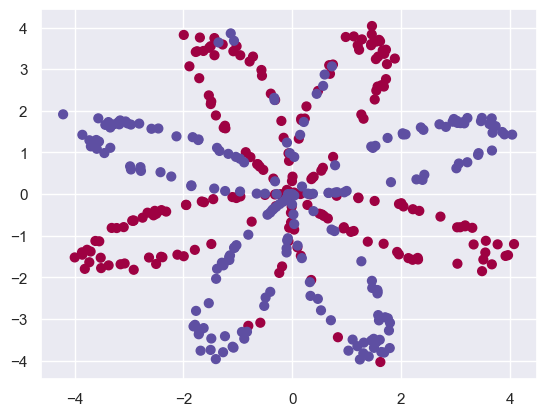

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral);

In [5]:
input_shape = X.shape
layers_size = [7, 4, 3]
dropout_rates = [1, 1, 1]
output_heads = [1]
output_labels = ['flower']
output_activations = {'flower':'sigmoid'}
activations = ['tanh', 'tanh', 'tanh']
model = Model(input_shape, layers_size, activations,
              dropout_rates=dropout_rates, 
              output_heads=output_heads,output_labels=output_labels,
              output_activations=output_activations)

Layers ............... Trainable Params
Dense1 ............... 21
Dense2 ............... 32
Dense3 ............... 15
Dense4 ............... 4
Total  ............... 72
Memory ............... 576 bytes (0 KB) (0.0 MB)


In [6]:
learning_rate = 0.001
decay=False
batch_size = -1
normalized = False
Y = {'flower': Y}
print(np.array(Y['flower']).shape)
optimizer = 'adam'
model.fit(X, Y, decay=decay,
           learning_rate=learning_rate, 
           tuning_param=1,optimizer=optimizer, 
          normalized=normalized,
          epochs=3000,
          batch_size=batch_size)

(400, 1)
Epoch  1/3000 Loss: 0.61207134   
Epoch  2/3000 Loss: 0.60752426   
Epoch  3/3000 Loss: 0.60301422   
Epoch  4/3000 Loss: 0.59854087   
Epoch  5/3000 Loss: 0.59409701   
Epoch  6/3000 Loss: 0.58966542   
Epoch  7/3000 Loss: 0.58521920   
Epoch  8/3000 Loss: 0.58074921   
Epoch  9/3000 Loss: 0.57624837   
Epoch 10/3000 Loss: 0.57170976   
Epoch 11/3000 Loss: 0.56713866   
Epoch 12/3000 Loss: 0.56254669   
Epoch 13/3000 Loss: 0.55794893   
Epoch 14/3000 Loss: 0.55336162   
Epoch 15/3000 Loss: 0.54880017   
Epoch 16/3000 Loss: 0.54427636   
Epoch 17/3000 Loss: 0.53979790   
Epoch 18/3000 Loss: 0.53537277   
Epoch 19/3000 Loss: 0.53100897   
Epoch 20/3000 Loss: 0.52671356   
Epoch 21/3000 Loss: 0.52249233   
Epoch 22/3000 Loss: 0.51834954   
Epoch 23/3000 Loss: 0.51428765   
Epoch 24/3000 Loss: 0.51030678   
Epoch 25/3000 Loss: 0.50640377   
Epoch 26/3000 Loss: 0.50257249   
Epoch 27/3000 Loss: 0.49880859   
Epoch 28/3000 Loss: 0.49510730   
Epoch 29/3000 Loss: 0.49146417   
Epoch

In [7]:
# Print train accuracy
predictions = model.predict(X, batch_size)
predictions = predictions['flower']
test_predictions = np.argmax(predictions, axis=1)
predictions = (predictions > 0.5).astype(int)
Y = Y['flower'][0]

In [8]:
accuracy_score(Y[:, 0], predictions)

0.9175

In [9]:
model_layers = model.layers

In [10]:
layer1 = model_layers['layer1']

In [11]:
layer1.weights

array([[ 4.34464976,  3.31268423, -2.69913837,  0.01440765, -0.11758934,
         0.63197539, -0.44921144],
       [ 4.16991815,  1.19774313,  2.29391622, -2.12403256, -3.40119075,
        -0.0701662 , -1.89973563]])

In [12]:
layer1.bias

array([[ 0.00434029, -0.17404077, -0.01034483,  0.08206361, -0.04306506,
         0.01670895,  0.02043321]])

In [13]:
layer1.trainable_params

21

In [14]:
layer1.name

'layer1'

In [15]:
layer1.units

7

In [16]:
layer1.activation

'tanh'

In [17]:
layer1.trainable

True

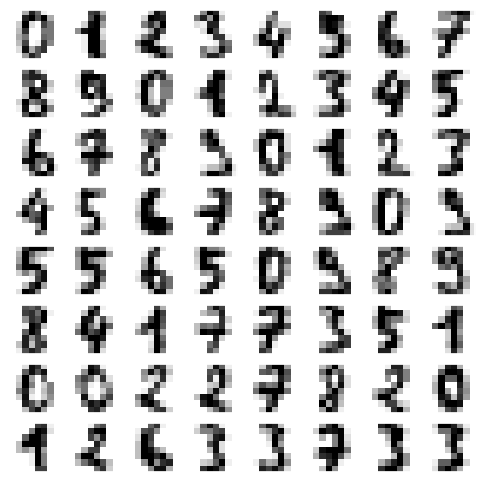

In [18]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [19]:
X = digits.data[200:, :]
Y = digits.target[200:]
 
X_test = np.array(digits.data[:200, :], dtype=np.float64)
Y_true = digits.target[:200]

In [20]:
print(X.shape)
print(Y.shape)

(1597, 64)
(1597,)


In [21]:
Y[:20]

array([1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3])

In [22]:
Y_train, _ = one_hot_encode(Y, True)

In [23]:
print(Y_train.shape)

(1597, 10)


In [24]:
Y_train[:20]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [25]:
input_shape = X.shape
layers = [25, 20, 15]
dropout_rates = [1.0, 1.0, 1.0, 1.0]
output_labels = ['mnist']
y = {'mnist': Y_train}
output_activations = {'mnist':'softmax'}
output_heads = [10]
activations = ['tanh', 'relu', 'relu']
model = Model(input_shape, layers, activations, dropout_rates, 
              output_heads=output_heads,output_labels=output_labels,
              output_activations=output_activations)

Layers ............... Trainable Params
Dense1 ............... 1625
Dense2 ............... 520
Dense3 ............... 315
Dense4 ............... 160
Total  ............... 2620
Memory ............... 20960 bytes (20 KB) (0.02 MB)


In [26]:
learning_rate = 1e-2
decay=False
normalized = False
optimizer = 'adam'
bias = False
batch_size = -1
model.fit(X, y, 
          learning_rate=learning_rate,
            tuning_param=1,
            optimizer=optimizer,batch_size=batch_size,
              decay=decay, normalized=normalized, 
          bias=bias, epochs=1000)

Epoch  1/1000 Loss: 2.48855091   
Epoch  2/1000 Loss: 2.21011750   
Epoch  3/1000 Loss: 2.07979219   
Epoch  4/1000 Loss: 1.94699290   
Epoch  5/1000 Loss: 1.82981833   
Epoch  6/1000 Loss: 2.29787248   
Epoch  7/1000 Loss: 1.73591727   
Epoch  8/1000 Loss: 1.86164706   
Epoch  9/1000 Loss: 1.67443635   
Epoch 10/1000 Loss: 1.88507920   
Epoch 11/1000 Loss: 1.54136119   
Epoch 12/1000 Loss: 1.62945240   
Epoch 13/1000 Loss: 1.40896557   
Epoch 14/1000 Loss: 1.81869756   
Epoch 15/1000 Loss: 2.31864460   
Epoch 16/1000 Loss: 1.38289186   
Epoch 17/1000 Loss: 1.87193920   
Epoch 18/1000 Loss: 1.70332609   
Epoch 19/1000 Loss: 1.67584993   
Epoch 20/1000 Loss: 1.47246209   
Epoch 21/1000 Loss: 1.48963119   
Epoch 22/1000 Loss: 1.23678243   
Epoch 23/1000 Loss: 1.39334364   
Epoch 24/1000 Loss: 1.07512186   
Epoch 25/1000 Loss: 1.43385446   
Epoch 26/1000 Loss: 1.19597282   
Epoch 27/1000 Loss: 1.45808093   
Epoch 28/1000 Loss: 1.02985199   
Epoch 29/1000 Loss: 1.17113521   
Epoch 30/1000 

In [27]:
test_predictions = model.predict(X_test, batch_size)
test_predictions = test_predictions['mnist']

In [28]:
test_prediction = np.argmax(test_predictions, axis=1)

In [29]:
accuracy_score(Y_true, test_prediction) * 100

91.5

In [30]:
model_layers = model.layers

In [31]:
layer2 = model_layers['layer2']

In [32]:
layer2.trainable_params

520

In [33]:
costs = model.costs
iterations = model.iterations

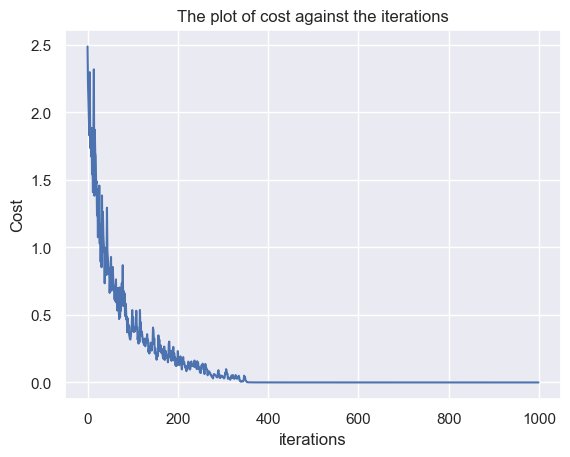

In [34]:
plt.plot(np.arange(len(iterations)), costs)
plt.title('The plot of cost against the iterations')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show();

The function we generated the data from is truly linear, by introducing non-linearity in our model using tanh and relu, our model was unable to  provide accurate predictions. For instance, relu removed negative values, but our function may generate negative values. So we can obviously conclude that linear regression will better for this task or our model needs to be adjusted to accomodate truly linear data.